<div class="alert alert-block alert-success">
    <b><center>LINEAR REGRESSION</center></b>
    <b><center>Tensorflow 2를 이용한 코드 예제</center></b>
</div>

# Configure Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import tensorflow as tf
from tensorflow.keras import utils, layers, models, losses

In [3]:
np.set_printoptions(linewidth=200, precision=2)
sns.set_style("whitegrid")
tf.__version__

'2.0.0'

# Prepare Data

>* total_bill : 전체 음식 가격 (US dollars)
>* tip        : 팁 금액 (US dollars)
>* sex        : 성별 (0=male, 1=female)
>* smoker     : 흡연 여부 (0=No, 1=Yes)
>* day        : 요일 (3=Thur, 4=Fri, 5=Sat, 6=Sun)
>* time       : 시간대 (0=Lunch, 1=Dinner)
>* size       : 동행자 수

In [4]:
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [5]:
# tips.replace({ "sex": {"Male": 0, "Female": 1}, "smoker": {"No": 0, "Yes": 1} }, inplace=True)
# tips.head(3)

In [6]:
# def scale(data):
#     return data.total_bill/(data.size+1)

In [7]:
# tips["tendency"] = tips[["total_bill", "size"]].apply(scale, axis=1)

In [8]:
# tips.head()

In [9]:
data = tips[["total_bill", "size"]].values
label = tips[["tip"]].values

# Analysis Datas

In [10]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


## Generate Model

In [11]:
model = models.Sequential([
    layers.Input([2]),
    layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


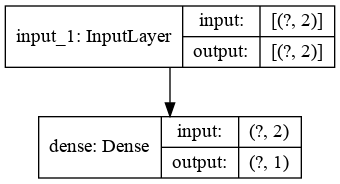

In [12]:
utils.plot_model(model, 'model.png', show_shapes=True)

In [13]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.SGD(1e-5)
)

## Training

In [14]:
history = model.fit(
    data, label, epochs=50
)

Train on 244 samples
Epoch 1/50
244/244 [==============================] - 0s 2ms/sample - loss: 589.1492
Epoch 2/50
244/244 [==============================] - 0s 43us/sample - loss: 505.1519
Epoch 3/50
244/244 [==============================] - 0s 43us/sample - loss: 434.5103
Epoch 4/50
244/244 [==============================] - 0s 44us/sample - loss: 372.9075
Epoch 5/50
244/244 [==============================] - 0s 44us/sample - loss: 320.3050
Epoch 6/50
244/244 [==============================] - 0s 44us/sample - loss: 274.4139
Epoch 7/50
244/244 [==============================] - 0s 44us/sample - loss: 235.6692
Epoch 8/50
244/244 [==============================] - 0s 42us/sample - loss: 202.0557
Epoch 9/50
244/244 [==============================] - 0s 41us/sample - loss: 173.7316
Epoch 10/50
244/244 [==============================] - 0s 41us/sample - loss: 149.3697
Epoch 11/50
244/244 [==============================] - 0s 42us/sample - loss: 128.7657
Epoch 12/50
244/244 [===========

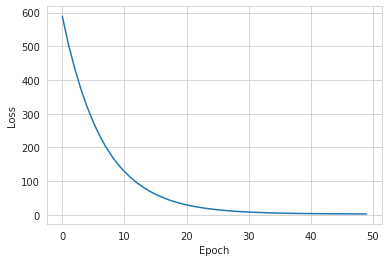

In [15]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history["loss"])
plt.show()

## Predict

In [16]:
errors = []
for itemData, itemLabel in zip(data, label):
    predicted = model.predict([itemData.tolist()])
    tip = np.asscalar(itemLabel)
    tipPred = np.asscalar(predicted)
    errors.append(tip - tipPred)

In [17]:
np.average(np.abs(errors))

1.4005824967827953

In [18]:
# errors